In [9]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
from sklearn.datasets import make_classification

In [11]:
##creating the dataset
X,y=make_classification(n_samples=1000 ,n_features=10 ,n_classes=2 ,random_state=15)

In [12]:
#test train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [15]:
score=accuracy_score(y_pred,y_test)
print('accureacy score:',score)
print('classification report:',classification_report(y_pred,y_test))
print('Confusion matrix:',confusion_matrix(y_pred,y_test))

accureacy score: 0.9166666666666666
classification report:               precision    recall  f1-score   support

           0       0.93      0.91      0.92       160
           1       0.90      0.92      0.91       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Confusion matrix: [[146  14]
 [ 11 129]]


Hyper parameter tunning 

1. Grid Search CV

In [16]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']

In [17]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [18]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [19]:
#grid search cv 
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [20]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [21]:
grid.fit(X_train,y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [22]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [23]:
print(grid.best_score_)

0.9228571428571428


In [24]:
y_pred=grid.predict(X_test)

In [25]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9266666666666666
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       165
           1       0.90      0.95      0.92       135

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[150  15]
 [  7 128]]


2. Randomised Search CV

In [26]:
from sklearn.model_selection import RandomizedSearchCV


In [27]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [28]:
randomcv.fit(X_train,y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [29]:
print(randomcv.best_score_)

0.9185714285714285


In [30]:
print(randomcv.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}


In [31]:
y_pred=randomcv.predict(X_test)

In [32]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.92
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       163
           1       0.90      0.93      0.91       137

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[148  15]
 [  9 128]]


Logistic regression for multiclass classification problem

In [33]:
X,y=make_classification(n_features=10,n_samples=1000,n_informative=3,n_classes=3,random_state=15)

In [34]:
X

array([[-1.28613186, -0.64833414,  1.04411477, ..., -1.3164116 ,
         1.01191003, -0.89806282],
       [-0.22222406,  2.083232  ,  1.19111402, ...,  0.98140271,
        -1.62879759,  1.37759419],
       [-0.43196264,  0.37574543, -1.37033375, ...,  1.2926021 ,
         0.925545  ,  0.23270542],
       ...,
       [-0.16384636, -0.41072503,  0.73908587, ...,  0.55830515,
         1.08971786, -0.26627295],
       [ 1.74969059, -1.12416838,  0.19980683, ...,  0.75255654,
         0.32229436, -0.17334302],
       [-0.24755583, -1.1705942 , -1.14058569, ...,  0.2063625 ,
         1.84351802, -0.81483138]])

In [35]:
y

array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
y_pred

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [38]:
score=accuracy_score(y_pred,y_test)
print('score:',score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

score: 0.79
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.73      0.81      0.77        91
           2       0.82      0.71      0.76       112

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[84  3 10]
 [10 74  7]
 [ 8 25 79]]


Logistic regression for imbalanced dataset

In [39]:
#generate and plot a imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification


In [40]:
X,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [41]:
X

array([[ 1.45122049, -1.08670474],
       [ 2.08029047, -0.97808443],
       [ 1.91805213, -1.0431487 ],
       ...,
       [ 0.83675119, -0.54161851],
       [ 0.45782986, -1.05177133],
       [ 0.27891721, -1.16309231]])

In [42]:
y #this dataset has more weightage of 0 then 1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
Counter(y) #0 are more 

Counter({np.int64(0): 985, np.int64(1): 15})

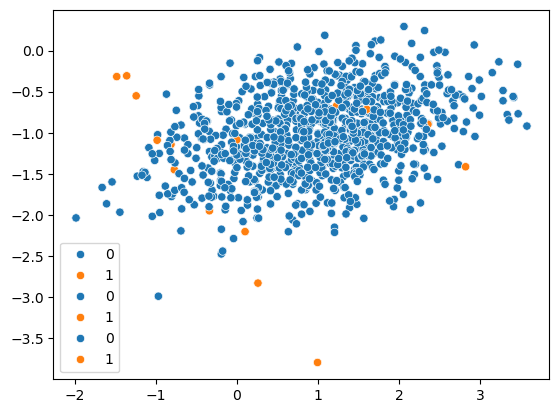

In [48]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [50]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [51]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [52]:
#Hyperparameter tunning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring='accuracy')

In [57]:
grid.fit(X_train,y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [58]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 1, 1: 1},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [59]:
y_pred=grid.predict(X_test)

In [60]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       0.00      0.00      0.00         0

    accuracy                           1.00       250
   macro avg       0.50      0.50      0.50       250
weighted avg       1.00      1.00      1.00       250

[[249   1]
 [  0   0]]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
